# Bài 4: K-means Clustering

### 1. Giới thiệu

- Trong bài trước, chúng ta đã làm quen với thuật toán Linear Regression - là thuật toán đơn giản nhất trong Supervised learning. Bài này tôi sẽ giới thiệu một trong những thuật toán cơ bản nhất trong Unsupervised learning - thuật toán K-means clustering (phân cụm K-means).

- Trong thuật toán K-means clustering, chúng ta không biết nhãn (label) của từng điểm dữ liệu. Mục đích là làm thế nào để phân dữ liệu thành các cụm (cluster) khác nhau sao cho "dữ liệu trong cùng một cụm có tính chất giống nhau".

Ví dụ: Một công ty muốn tạo ra những chính sách ưu đãi cho những nhóm khách hàng khác nhau dựa trên sự tương tác giữa mỗi khách hàng với công ty đó (số năm là khách hàng, số tiền khách hàng đã chi trả cho công ty, độ tuổi, giới tính, thành phố, nghề nghiệp,...). Giả sử công ty đó có rất nhiều dữ liệu của rất nhiều khách hàng nhưng chưa có cách nào chia toàn bộ khách hàng đó thành một số nhóm/cụm khác nhau. Nếu một người biết Machine Learning được đặt câu hỏi này, phương pháp đầu tiên anh (chị) ta nghĩ đến là K-means Clustering. Vì nó là một trong những thuật toán đầu tiên mà ... Sau khi đã phân ra được từng nhóm, nhân viên công ty đó có thể lựa chọn ra một vài khách hàng trong mỗi nhóm để quyết định xem mỗi nhóm tương ứng với nhóm khách hàng nào. Phần việc cuối cùng này cần sự can thiệp của con người, nhưng lượng công việc đã được rút gọn đi rất nhiều. 

In [11]:
import matplotlib.pyplot as plt
import cv2

(np.float64(-0.5), np.float64(560.5), np.float64(431.5), np.float64(-0.5))

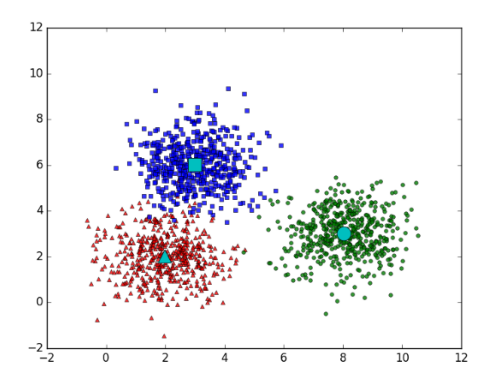

In [12]:
img = cv2.imread('ex.png')

plt.imshow(img)
plt.axis('off')  # Hide axes

- Giả sử mỗi clustering có một điểm đại diện (center) màu vàng. Và những điểm xung quanh mỗi center thuộc vào cùng một nhóm với center đó. Một cách đơn giản nhất, xét một điểm bất kỳ, ta xét xem điểm đó gần với center nào nhất thì nó thuộc về cùng nhóm với center đó. Tới đây, chúng ta có một bài toán thú vị: Trên một vùng biển hình vuông lớn có ba đảo hình vuông, tam giác, và tròn màu vàng như hình trên. Một điểm trên biển được gọi là thuộc lãnh hải của một đảo nếu nó nằm gần đảo này hơn so với hai đảo kia. Hãy xác định ranh giới lãnh hải của hai đảo.
- Dưới đây là ví dụ cho 5 đảo:

(np.float64(-0.5), np.float64(586.5), np.float64(549.5), np.float64(-0.5))

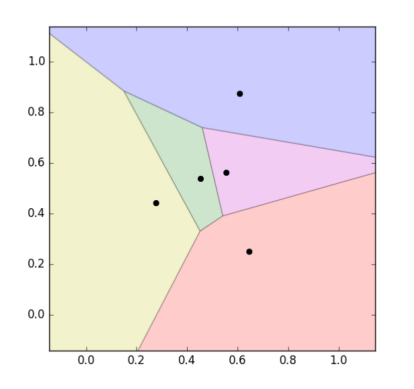

In [13]:
img2 = cv2.imread('ex2.png')

plt.imshow(img2)
plt.axis('off')  # Hide axes

### 2. Phân tích toán học

Mục đích cuối cùng của thuật toán phân nhóm này là: từ dữ liệu đầu vào và số lượng nhóm chúng ta muốn tìm, hãy chỉ ra center của mỗi nhóm và phân các điểm dữ liệu vào các nhóm tương ứng. Giả sử thêm rằng mỗi điểm dữ liệu chỉ thuộc vào đúng một nhóm.

### 3. Tóm tắt thuật toán

Tới đây tôi xin được tóm tắt lại thuật toán (đặc biệt quan trọng với các bạn bỏ qua phần toán học bên trên) như sau:
- Đầu vào: Dữ liệu X và số lượng cluster cần tìm K
- Đầu ra: Các center M và label vector cho từng điểm dữ liệu Y
1. Chọn K điểm bất kỳ làm các center ban đầu.
2. Phân mỗi điểm dữ liệu vào cluster có center gần nó nhất
3. Nếu việc gán dữ liệu vào từng cluster ở bước 2 không thay đổi so với vòng lặp trước nó thì ta dừng thuật toán
4. Cập nhật center cho từng cluster bằng cách lấy trung bình cộng của tất cả các điểm dữ liệu đã được gán vào cluster đó sau bước 2
5. Quay lại bước 2

### 4. Ví dụ trên Python

- Giới thiệu bài toán
Để kiểm tra mức độ hiệu quả của một thuật toán, chúng ta sẽ làm một ví dụ đơn giản (thường được gọi là toy example). Trước hết, chúng ta chọn center cho từng cluster và tạo dữ liệu cho từng cluster bằng cách lấy mẫu theo phân phối chuẩn có kỳ vọng là center của cluster đó và ma trận hiệp phương sai (covariance matrix) là ma trận đơn vị. 

Trước tiên, chúng ta khai báo các thư viện cần dùng. Chúng ta cần numpy và matplotlib như trong bài Linear Regression cho việc tính toán ma trận và hiển thị dữ liệu. Chúng ta cũng cần thêm thư viện scipy.spatial.distance để tính khoảng cách giữa các cặp điểm trong hai tập hợp một cách hiệu quả.

In [14]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist 
np.random.seed(11) 

Tiếp theo, ta tạo dữ liệu bằng cách lấy các điểm theo phân phối chuẩn có kỳ vọng tại các điểm có tọa độ (2,2), (8,3) và (3, 6), ma trận hiệp phương sai giống nhau và là ma trận đơn vị. Mỗi cluster có 500 điểm. (Chú ý rằng mỗi điểm dữ liệu là một hàng của ma trận dữ liệu).

In [15]:
means = [[2, 2], [8, 3], [3, 6]] # Kỳ vọng của các cluster
cov = [[1, 0], [0, 1]] # Ma trận hiệp phương sai (covariance matrix) là ma trận đơn vị
N = 500 # Số lượng điểm trong mỗi cluster
X0 = np.random.multivariate_normal(means[0], cov, N) # Tao du lieu cho cluster 0
X1 = np.random.multivariate_normal(means[1], cov, N) # Tao du lieu cho cluster 1
X2 = np.random.multivariate_normal(means[2], cov, N) # Tao du lieu cho cluster 2

X = np.concatenate((X0, X1, X2), axis=0) # Ma trận dữ liệu, mỗi hàng là một điểm dữ liệu
K = 3 # Số lượng cluster

original_label = np.asarray([0]*N + [1]*N + [2]*N).T # Nhãn ban đầu của các điểm dữ liệu

- Hiển thị dữ liệu trên đồ thị

Chúng ta cần một hàm kmeans_display để hiển thị dữ liệu. Sau đó hiển thị dữ liệu theo nhãn ban đầu.

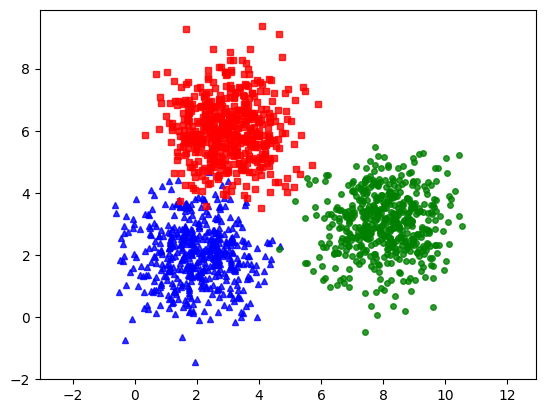

In [16]:
def kmeans_display(X, label): 
    K = np.amax(label) + 1 # số lượng cluster
    X0 = X[label == 0, :] # Lấy các điểm dữ liệu thuộc cluster 0
    X1 = X[label == 1, :] # Lấy các điểm dữ liệu thuộc cluster 1
    X2 = X[label == 2, :] # Lấy các điểm dữ liệu thuộc cluster 2

    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8) # Điểm dữ liệu thuộc cluster 0
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8) # Điểm dữ liệu thuộc cluster 1
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8) # Điểm dữ liệu thuộc cluster 2

    plt.axis('equal') # Đặt tỷ lệ trục x và y bằng nhau
    plt.plot()
    plt.show()

kmeans_display(X, original_label) # Hiển thị dữ liệu theo nhãn ban đầu

Trong đồ thị trên, mỗi cluster tương ứng với một màu. Có thể nhận thấy rằng có một vài điểm màu đỏ bị lẫn sang các phần cluster màu xanh.

- Các hàm số cần thiết cho K-means clustering
Viết các hàm: 
1. kmeans_init_centers để khởi tạo các centers ban đầu. 
2. kmeans_assign_labels để gán nhãn mới cho các điểm khi biết các centers.
3. kmeans_update_centers để cập nhật các centers mới dựa trên dữ liệu vừa được gán nhãn.
4. has_converged để kiểm tra điều kiện dừng của thuật toán.

In [ ]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

Phần chính của K-means clustering:

In [18]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Áp dụng thuật toán vừa viết vào dữ liệu ban đầu, hiển thị kết quả cuối cùng.

Centers found by our algorithm:
[[2.99084705 6.04196062]
 [1.97563391 2.01568065]
 [8.03643517 3.02468432]]


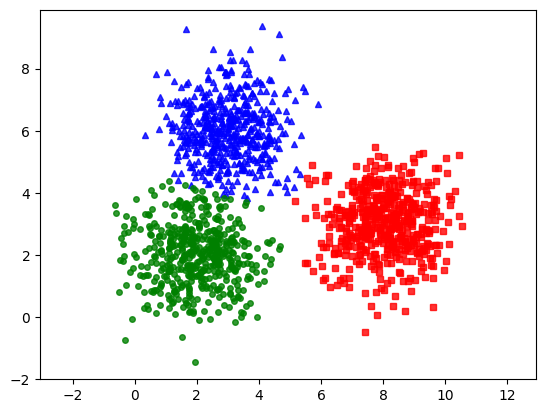

In [19]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

- Từ kết quả này chúng ta thấy rằng thuật toán K-means clustering làm việc khá thành công, các centers tìm được khá gần với kỳ vọng ban đầu. Các điểm thuộc cùng một cluster hầu như được phân vào cùng một cluster (trừ một số điểm màu đỏ ban đầu đã bị phân nhầm vào cluster màu xanh da trời, nhưng tỉ lệ là nhỏ và có thể chấp nhận được).

- Dưới đây là hình ảnh động minh họa thuật toán qua từng vòng lặp, chúng ta thấy rằng thuật toán trên hội tụ rất nhanh, chỉ cần 6 vòng lặp để có được kết quả cuối cùng:

### Kết quả tìm được bằng thư viện scikit-learn

Để kiểm tra thêm, chúng ta hãy so sánh kết quả trên với kết quả thu được bằng cách sử dụng thư viện scikit-learn.

Centers found by scikit-learn:
[[1.97826939 2.00223913]
 [2.98759958 6.02896527]
 [8.0410628  3.02094748]]


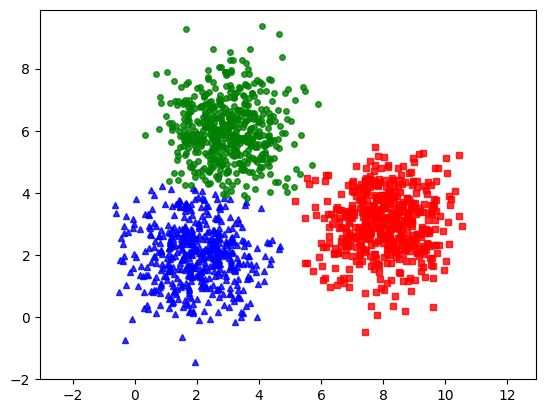

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)